# Train Deep Learning Model 

In [1]:
# step 1--> Load the preprocess DATA

In [2]:
import os 
import numpy as np 
import cv2
import gc

In [3]:
# load the preprocess data
data = np.load('./data/data_preprocess.npz')

In [4]:
X = data['arr_0']
y = data['arr_1']

In [5]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

In [6]:
y

array(['Mask', 'Mask', 'Mask', ..., 'Mask_Nose_Mouth', 'Mask_Nose_Mouth',
       'Mask_Nose_Mouth'], dtype='<U15')

In [7]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

# PreProcessing "y"

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
onehot = OneHotEncoder()

In [13]:
y_onehot = onehot.fit_transform(y.reshape(-1,1))
# -1,1 --> column matrix 

In [14]:
y_onehot

<9959x4 sparse matrix of type '<class 'numpy.float64'>'
	with 9959 stored elements in Compressed Sparse Row format>

In [15]:
y_array = y_onehot.toarray()

In [16]:
y_array.shape


(9959, 4)

In [17]:
y_array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [18]:
# int the above 1st column is mask 2--> Mask chin  3--> mask mouth chin 4--> mask nose mouth 

# Split the data into train and test set 

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y_array , test_size=0.2 , random_state=42)

In [20]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

Deep Learning Model 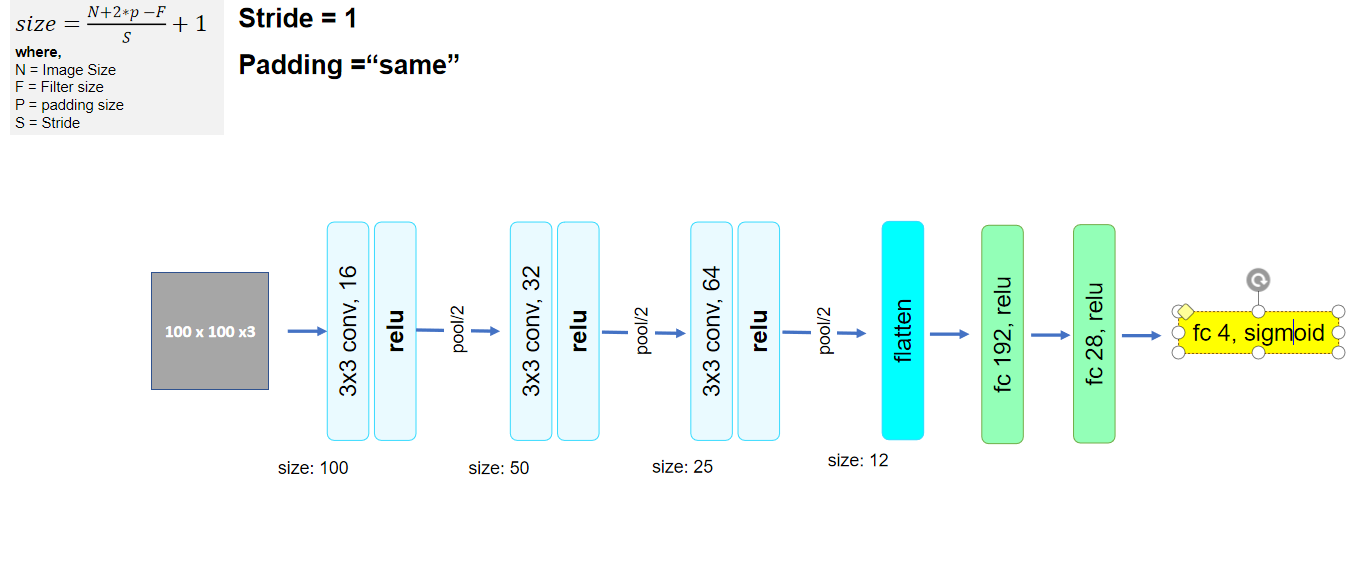

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [22]:
# Convolutional Neural Network 


In [23]:
model = Sequential([
    layers.Conv2D(16,3,padding = 'same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding = 'same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same' , activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])


In [29]:
# compiling CNN model 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [31]:
#Training CNN
history = model.fit(x=x_train ,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=10)

Epoch 1/10
266/266 [==============================] - 28s 104ms/step - loss: 0.2294 - accuracy: 0.9222 - val_loss: 0.0688 - val_accuracy: 0.9784
Epoch 2/10
266/266 [==============================] - 28s 104ms/step - loss: 0.0812 - accuracy: 0.9721 - val_loss: 0.1720 - val_accuracy: 0.9367
Epoch 3/10
266/266 [==============================] - 28s 104ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0620 - val_accuracy: 0.9839
Epoch 4/10
266/266 [==============================] - 28s 104ms/step - loss: 0.0285 - accuracy: 0.9918 - val_loss: 0.0668 - val_accuracy: 0.9869
Epoch 5/10
266/266 [==============================] - 28s 104ms/step - loss: 0.0260 - accuracy: 0.9912 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 6/10
266/266 [==============================] - 28s 105ms/step - loss: 0.0164 - accuracy: 0.9936 - val_loss: 0.0412 - val_accuracy: 0.9890
Epoch 7/10
266/266 [==============================] - 28s 105ms/step - loss: 0.0168 - accuracy: 0.9937 - val_loss: 0.0673 - val_ac

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt

In [33]:
history_df = pd.DataFrame(history.history)

In [34]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.229409,0.922179,0.068828,0.978414
1,0.081213,0.972135,0.171974,0.936747
2,0.049919,0.984310,0.062041,0.983936
3,0.028515,0.991841,0.066829,0.986948
4,0.026013,0.991214,0.040212,0.987952
5,0.016433,0.993599,0.041162,0.988956
6,0.016768,0.993724,0.067293,0.981426
7,0.010942,0.996360,0.038198,0.987952
8,0.011386,0.995607,0.060887,0.989960
9,0.014721,0.994979,0.069632,0.985944


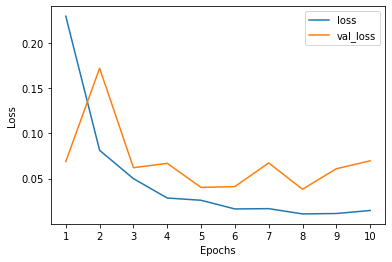

In [35]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

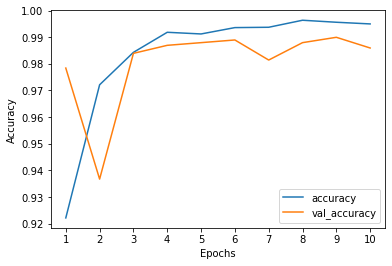

In [36]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [37]:
# save CNN Model 
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


In [38]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]